# Projeto 4 - Titanic - Irá sobreviver ou não
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img17.png?raw=true" width="500" height="100"/>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
from sklearn.inspection import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [37]:
df=pd.read_csv('https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset4.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [39]:
total = df.groupby('Survived').agg(n = ('Survived','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [40]:
total

,Survived,n,perc
0,0,549,61.616162
1,1,342,38.383838


# Ver se tem valores fora do padrão

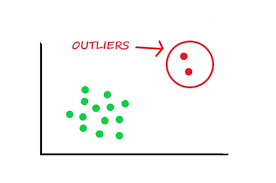

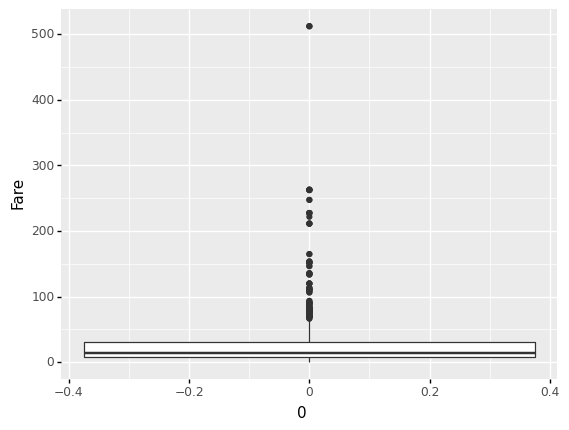

<ggplot: (87504420261)>

In [41]:
(
    ggplot(df) +
    geom_boxplot(aes(x = 0 , y='Fare'))
)

## Separa em target e feature

<img src="https://miro.medium.com/max/1664/1*HQQPUO8whJzuQsyJaWZL_A.jpeg" width="300" height="100"/>

In [42]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y = df['Survived']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

## Tratar variáveis categóricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img7.png?raw=true" width="600" height="100"/>

In [44]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan))

In [45]:
categorical_transformer = make_pipeline(SimpleImputer(strategy='constant', missing_values=np.nan),
                                        OneHotEncoder(handle_unknown='ignore')
                                       )

In [47]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['Pclass',
                               'Age',
                               'SibSp',
                               'Parch',
                               'Fare']),
        (categorical_transformer,['Sex',
                                  'Cabin',
                                  'Embarked']))

In [48]:
preprocessor.fit_transform(X)

<891x159 sparse matrix of type '<class 'numpy.float64'>'
	with 5827 stored elements in Compressed Sparse Row format>

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [49]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000)).fit(X_train, y_train)
#LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis()).fit(X_train, y_train)
DT = make_pipeline(preprocessor,DecisionTreeClassifier()).fit(X_train, y_train)
KN = make_pipeline(preprocessor,KNeighborsClassifier()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor,SVC(probability=True)).fit(X_train,y_train) 
RF = make_pipeline(preprocessor,RandomForestClassifier()).fit(X_train,y_train) 

## Feature Importance
<img src="https://www.scikit-yb.org/en/latest/_images/importances-1.png" width="350" height="40"/>

In [50]:
result = permutation_importance(
    RF, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

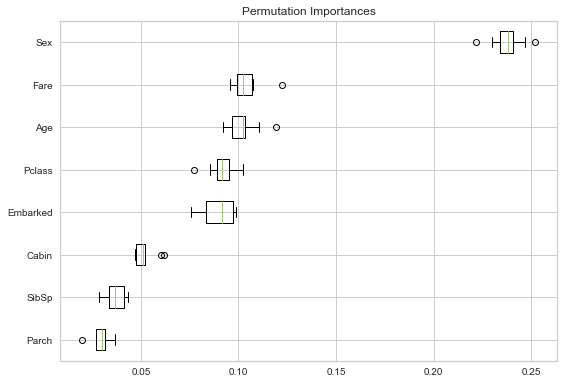

In [51]:
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

## Acurácia do Treino

In [52]:
print("Acurácia treino LR:", LR.score(X_train,y_train), "\n")
#print("Acurácia treino LDA:", LDA.score(X_train,y_train), "\n")
print("Acurácia treino DT:", DT.score(X_train,y_train), "\n")
print("Acurácia treino KN:", KN.score(X_train,y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train,y_train), "\n")
print("Acurácia treino RF:", RF.score(X_train,y_train), "\n")

Acurácia treino LR: 0.8204697986577181 

Acurácia treino DT: 0.9815436241610739 

Acurácia treino KN: 0.7936241610738255 

Acurácia treino SVM: 0.6728187919463087 

Acurácia treino RF: 0.9815436241610739 



## Matriz de confusão + Métricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img14.png?raw=true" width="350" height="100"/>

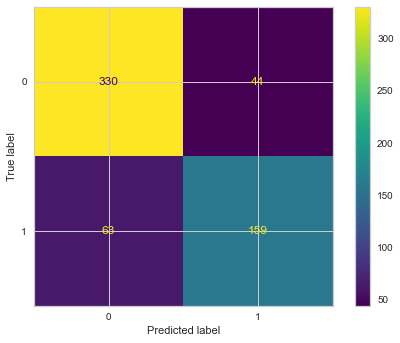

In [53]:
ConfusionMatrixDisplay.from_estimator(LR, X_train,y_train)
plt.show()

## Acurácia, Precision e Recall do Treino

In [54]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          #LDA.score(X_train,y_train),
                          DT.score(X_train,y_train),
                          KN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 0),
                          #precision_score(y_train, LDA.predict(X_train), pos_label = 0),
                          precision_score(y_train, DT.predict(X_train), pos_label = 0),
                          precision_score(y_train, KN.predict(X_train), pos_label = 0),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 0),
                          precision_score(y_train, RF.predict(X_train), pos_label = 0)],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 0),
                          #recall_score(y_train, LDA.predict(X_train), pos_label = 0),
                          recall_score(y_train, DT.predict(X_train), pos_label = 0),
                          recall_score(y_train, KN.predict(X_train), pos_label = 0),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 0),
                          recall_score(y_train, RF.predict(X_train), pos_label = 0)]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.820470,0.839695,0.994652
DT,0.981544,0.973890,0.997326
KN,0.793624,0.811414,0.874332
SVM,0.672819,0.672447,0.933155
RF,0.981544,0.976378,0.994652


## Curva ROC
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img15.png?raw=true" width="350" height="200"/>

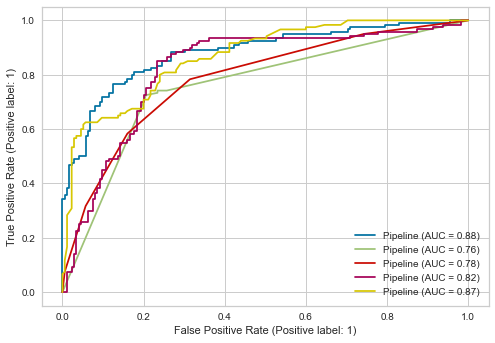

In [55]:
RocCurveDisplay.from_estimator(LR, X_test, y_test,drop_intermediate=False,ax=plt.gca())
#RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(DT, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(KN, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(SVM, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(RF, X_test, y_test,drop_intermediate=False,ax=plt.gca())

plt.show()

## Encapsular o modelo e Salvar

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img9.png?raw=true" width="200" height="80"/>

In [56]:
pickle.dump(LR, open('Modelo_Titanic.sav', 'wb'))

## Abrir modelo salvo

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img10.png?raw=true" width="300" height="100"/>

In [57]:
loaded_model = pickle.load(open('Modelo_Titanic.sav', 'rb'))

## Testar agora pro teste. Ver se houve overfitting

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img11.png?raw=true" width="150" height="80"/>

In [58]:
print("Acurácia teste LR:", loaded_model.score(X_test, y_test))

Acurácia teste LR: 0.8203389830508474
